In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc("pdf", fonttype=42)

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')


samples = samples_published + samples_new

In [2]:
nickname_dic = {'CT15076':'KZ1','CT15082':'KZ2','CT15092':'KZ3','CT15099':'KZ4','CT15127':'KZ5','CT15113':'KZ6','AB0913':'RU1','CT130918-2A':'SV1',
'100211-9A':'SV2','CT130918-9A':'SV3','CT130919-5A':'SV4','100411-5':'SV5','CT130919-8A':'SV6','AB0926':'SV7','100211-1A':'SV8'}

for smp in samples:
    if smp.name in nickname_dic:
        smp.original = smp.name
        smp.name = nickname_dic[smp.name]

        # Purge erroneous ages
        smp.bestage = smp.bestage[smp.bestage>1]

        print(smp.name,smp.original)

SV8 100211-1A
SV2 100211-9A
SV5 100411-5
RU1 AB0913
SV7 AB0926
SV1 CT130918-2A
SV3 CT130918-9A
SV4 CT130919-5A
SV6 CT130919-8A
KZ1 CT15076
KZ2 CT15082
KZ3 CT15092
KZ4 CT15099
KZ6 CT15113
KZ5 CT15127


In [3]:
kz_samples = [smp for smp in samples if 'KZ' in smp.name]
kz_samples.sort(key=lambda x: x.name, reverse=True)
sv_samples = [smp for smp in samples if 'SV' in smp.name]
sv_samples.sort(key=lambda x: x.name, reverse=True)

ru = [smp for smp in samples if 'RU' in smp.name]

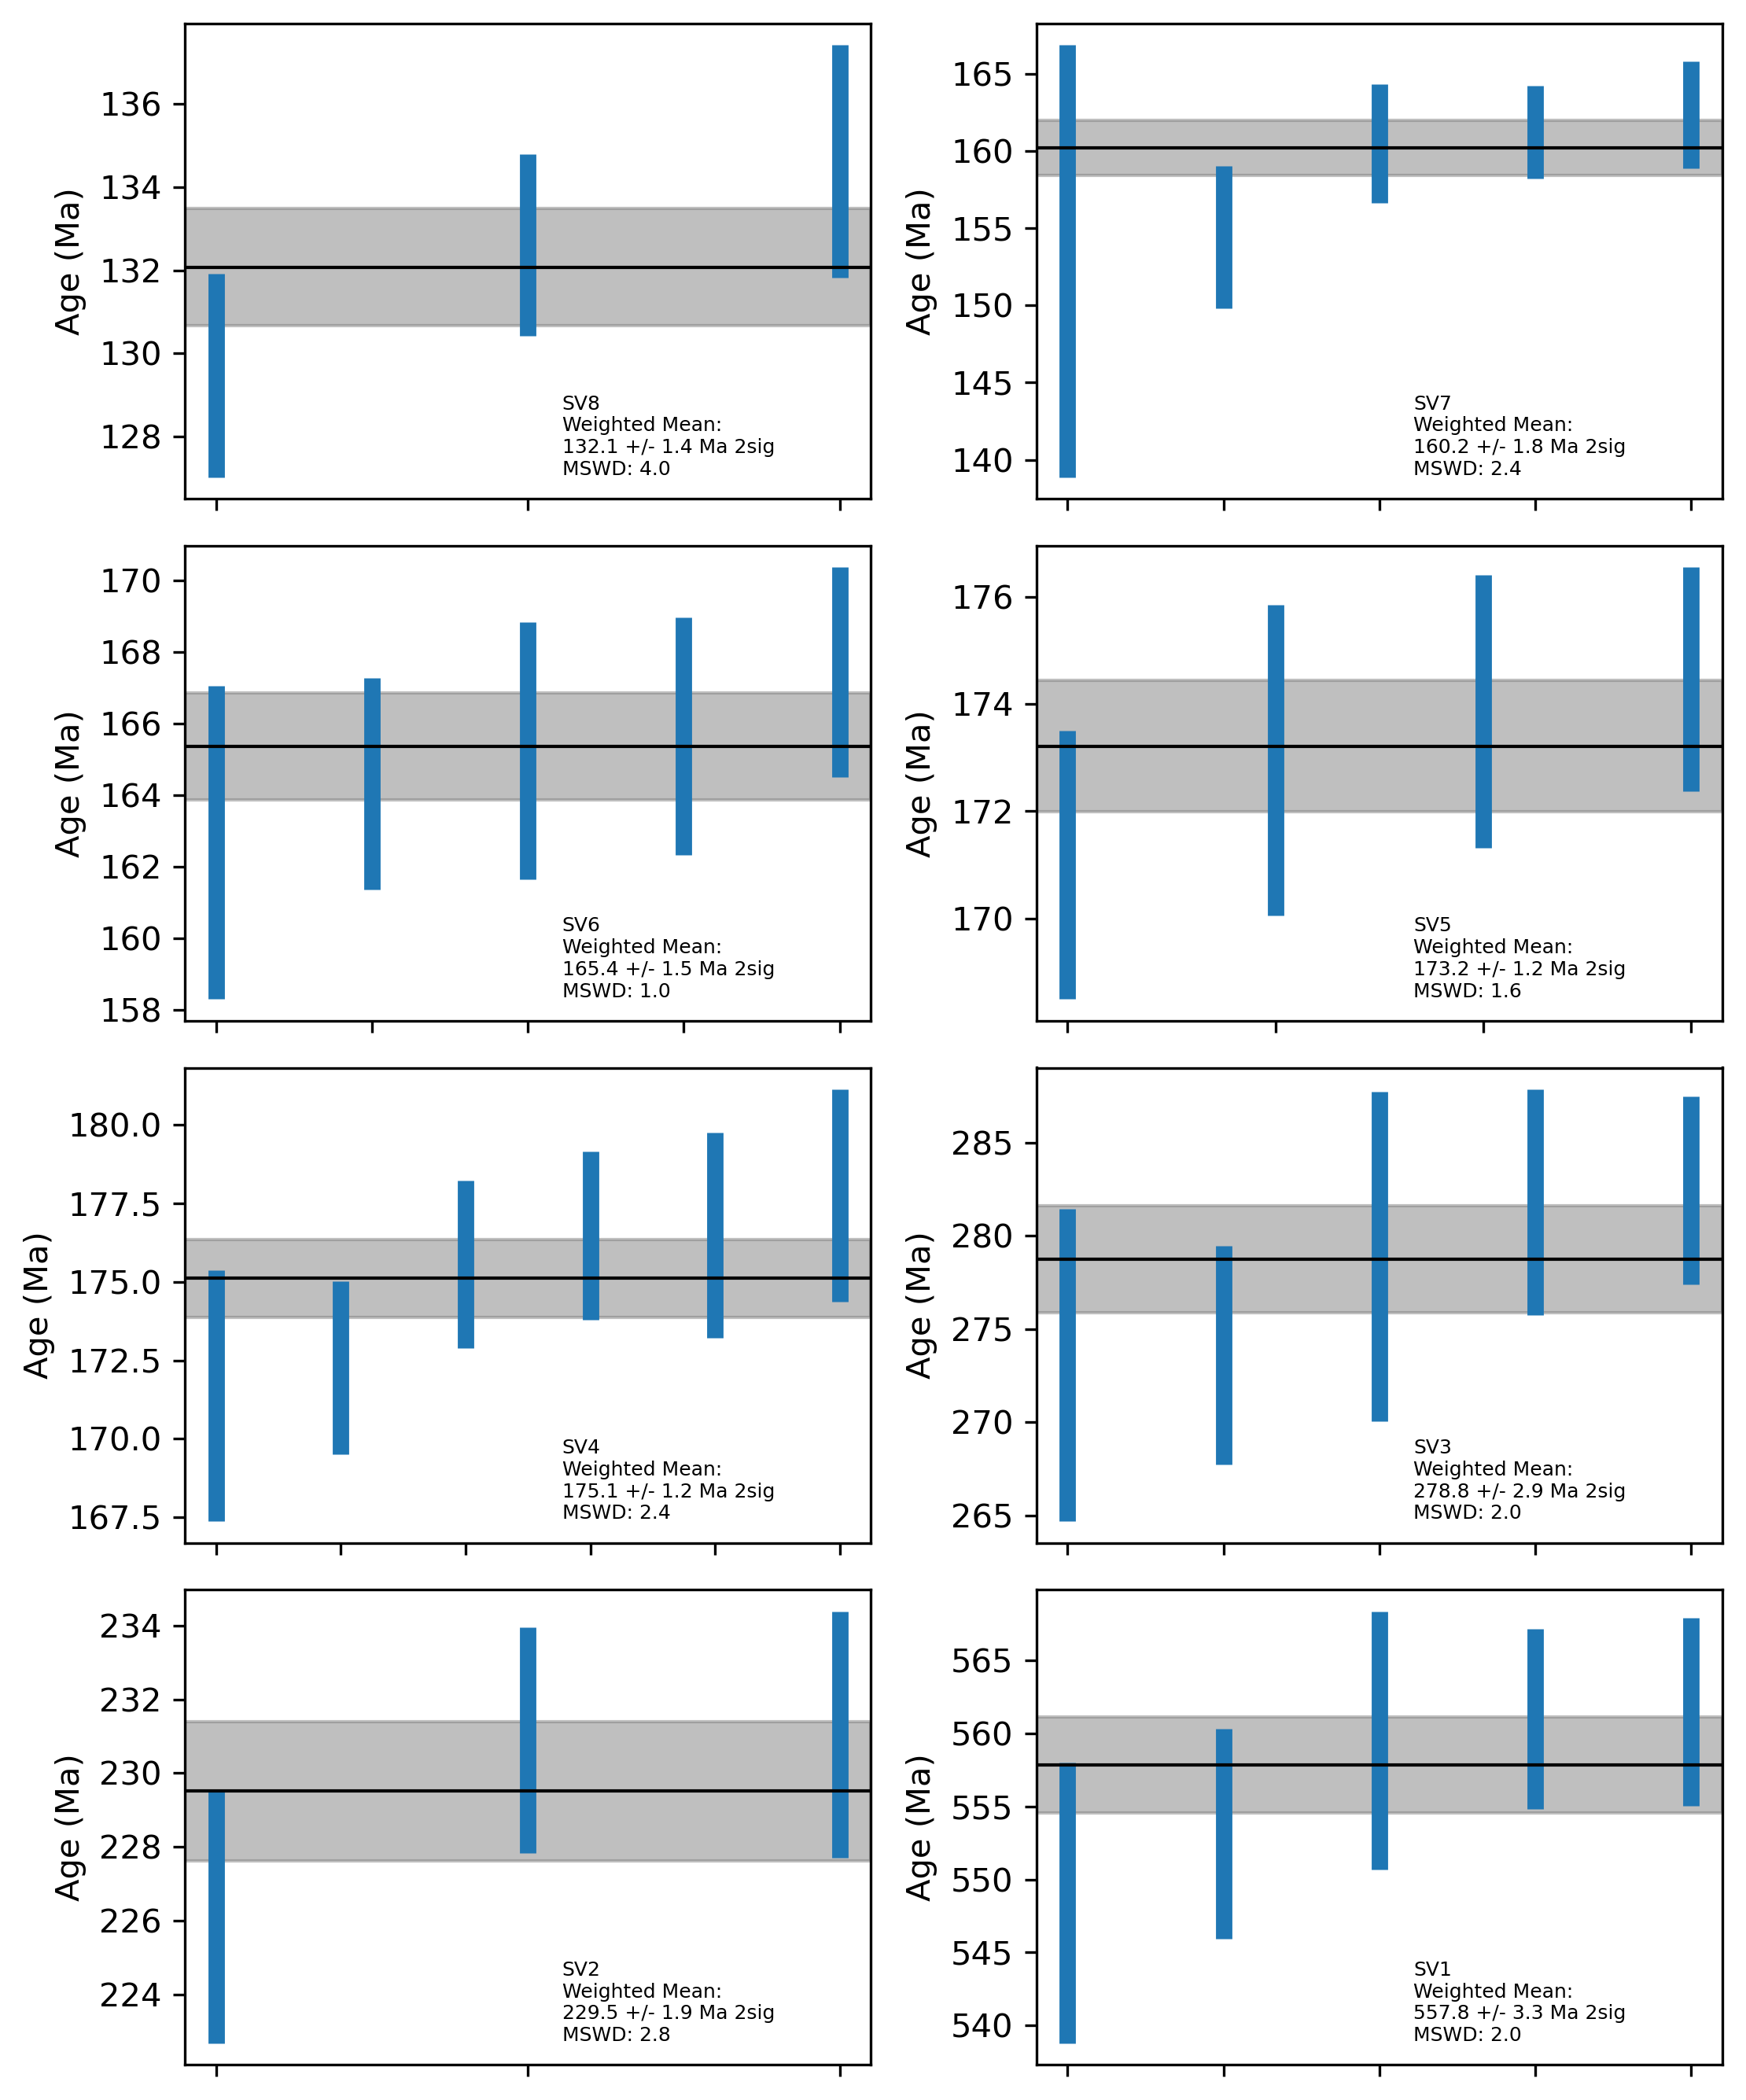

In [4]:
# Plot MDAs
fig, axs = plt.subplots(4,2,dpi=300,figsize=(7.5,9))

for k,smp in enumerate(sv_samples):
    smp.plot_mda(axs.flat[k])

plt.tight_layout()

fig.savefig('sv_mda_plots.pdf')

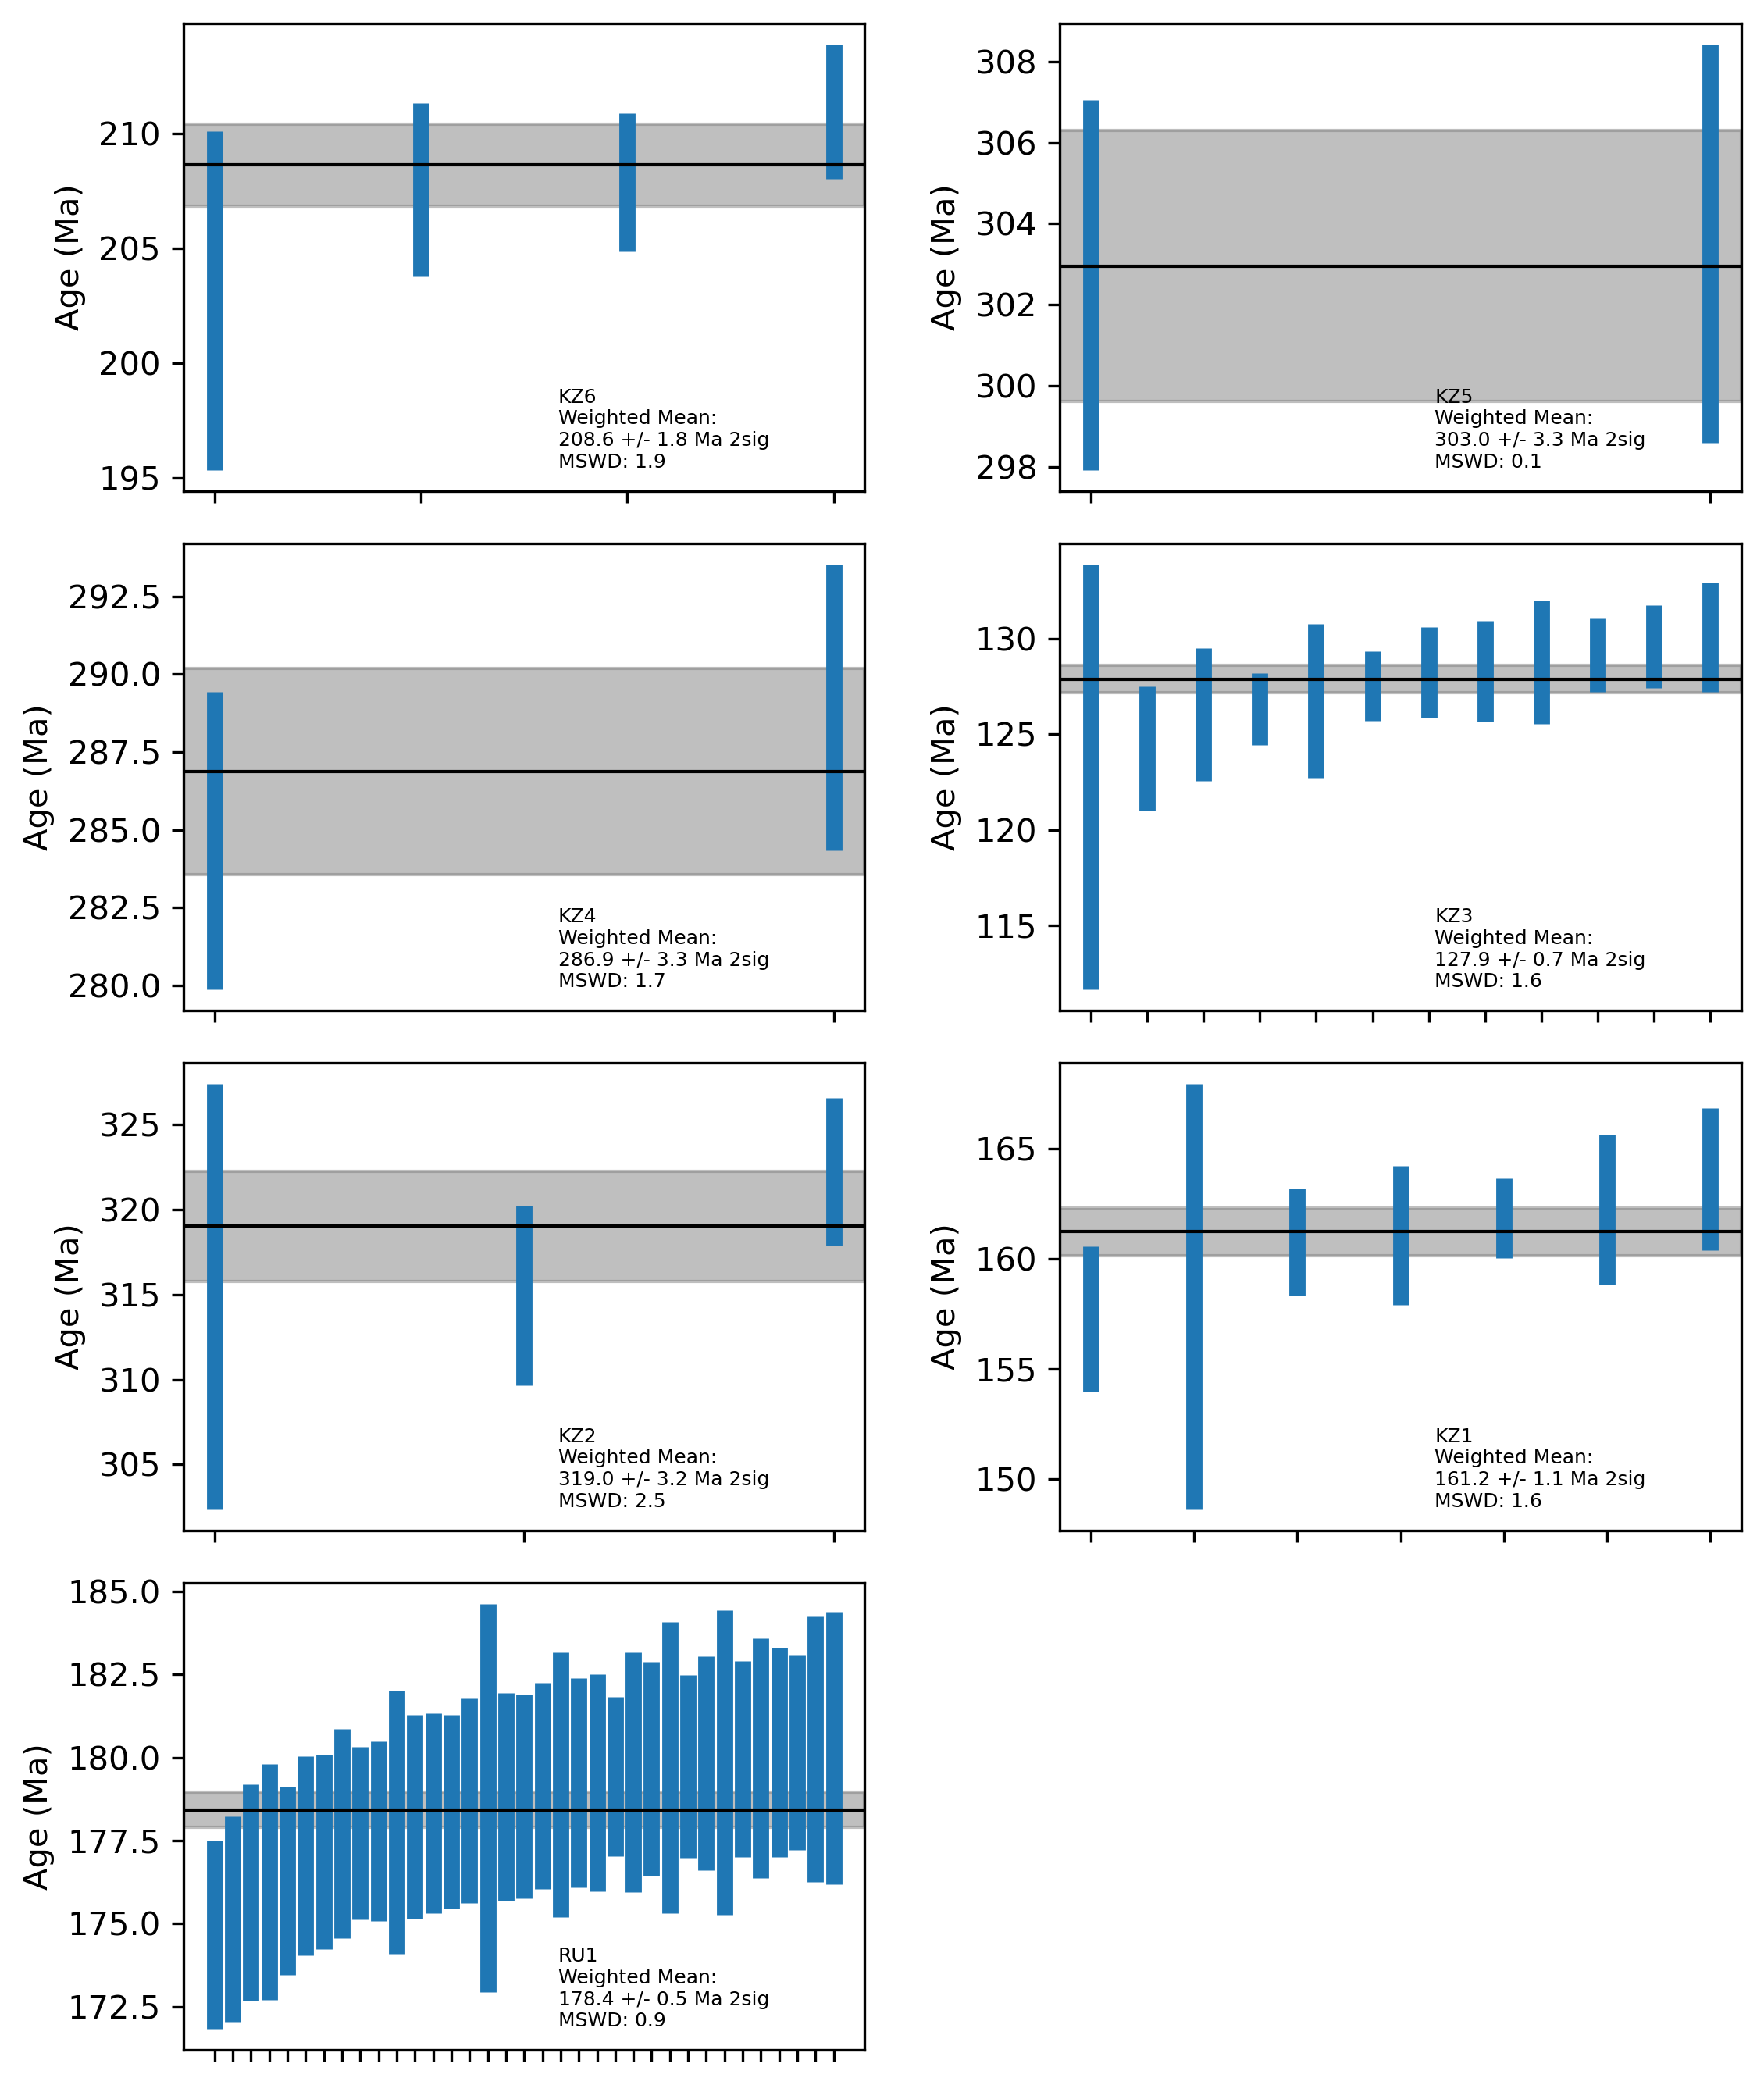

In [6]:
# Plot MDAs
fig, axs = plt.subplots(4,2,dpi=300,figsize=(7.5,9))

for k,smp in enumerate(kz_samples+ru):
    smp.plot_mda(axs.flat[k])

axs.flat[7].remove()
plt.tight_layout()

fig.savefig('kz_mda_plots.pdf')